###Gestion de datos
###Taller No 1
###Profesor Fabian Peña
###Norbey Marin
###Bryan Leonardo Figueredo Gonzalez


####Instalando paquetes e Importando librerias necesarias

In [ ]:
!pip install pandas_profiling==3.2.0
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 6.8 MB/s 
     |████████████████████████████████| 62 kB 952 kB/s 
     |████████████████████████████████| 4.7 MB 41.8 MB/s 
     |████████████████████████████████| 690 kB 38.2 MB/s 
     |████████████████████████████████| 102 kB 10.0 MB/s 
     |████████████████████████████████| 812 kB 57.7 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=be02fc34a6f59dccff0ba106bde1b11dd291549ffbfc583c2a78dccbe2463b85
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=2095a4914da11a37127d38d7a5cce0c507a16b201b4f5b301da506360e68b281
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin i

In [ ]:
import pandas_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy import stats
%matplotlib inline
from datetime import datetime
from datetime import date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

####Cargando el dataSet de GoogleDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Secuestro_df = pd.read_csv('/content/drive/MyDrive/GestionDatos/data/Taller1/SECUESTRO.csv')
Homicidios_df = pd.read_csv('/content/drive/MyDrive/GestionDatos/data/Taller1/Homicidios_accidente_de_tr_nsito_Polic_a_Nacional.csv')
Extorcion_df = pd.read_csv('/content/drive/MyDrive/GestionDatos/data/Taller1/EXTORSI_N.csv')
Terrorismo_df = pd.read_csv('/content/drive/MyDrive/GestionDatos/data/Taller1/Reporte_Delito_Terrorismo_Polic_a_Nacional.csv')
Poblacion2018 = pd.read_excel('/content/drive/MyDrive/GestionDatos/data/Taller1/Poblacion2018.xlsx')
proyeccion_df = pd.read_excel('/content/drive/MyDrive/GestionDatos/data/Taller1/anexo-proyecciones-poblacion-Municipal_Area_2018-2035.xlsx')

In [ ]:
Terrorismo_df.head()

,Departamento,Municipio,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,CANTIDAD
0,PUTUMAYO,MOCOA (CT),86001000,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,05/01/2010,1
1,ARAUCA,TAME,81794000,ARTEFACTO INCENDIARIO,06/01/2010,1
2,META,VILLAVICENCIO (CT),50001000,GRANADA DE MANO,06/01/2010,1
3,ARAUCA,FORTUL,81300000,CILINDRO BOMBA,07/01/2010,1
4,META,URIBE,50370000,MINA ANTIPERSONA,11/01/2010,1


In [ ]:
Terrorismo_df.dtypes

Departamento    object
Municipio       object
CODIGO DANE      int64
ARMAS MEDIOS    object
FECHA HECHO     object
CANTIDAD         int64
dtype: object

####Realizando profile en los dataset

In [ ]:
profile = ProfileReport(Extorcion_df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Terrorismo_df1 = Terrorismo_df
Extorcion_df1 = Extorcion_df
Secuestro_df1 = Secuestro_df
Homicidios_df1 = Homicidios_df

###2.1. [4%] ¿Cuáles han sido los departamentos (TOP 3) más afectados en términos de cantidad de delitos cometidos en los últimos 5 años?

####Resolviendo el punto 2.1

####Funciones para el casteo de fechas

In [ ]:
def casteofecha(fecha):
    fecha_dt = datetime.strptime(fecha, '%d/%m/%Y')
    return fecha_dt

def lastYear(nYear, dataframe, columnDate):
  #convierte la fecha a formato datetime
  dataframe[columnDate] = pd.to_datetime(dataframe[columnDate])
  #encuentra la fecha mayor
  maxValue = max(dataframe[columnDate])
  #resta los años y los retorna
  dateMin = maxValue + relativedelta(years=-nYear)
  return dateMin

In [ ]:
#encontrando fecha minima para los 4 dataframe
dateMinSecuestro = lastYear(5,Secuestro_df1,'FECHA HECHO')
dateMinHomicidios = lastYear(5,Homicidios_df1,'FECHA HECHO')
dateMinExtorsion = lastYear(5,Extorcion_df1,'FECHA HECHO')
dateMinTerrorismo = lastYear(5,Terrorismo_df1,'FECHA HECHO')

In [ ]:
# nuevos dataFrame con los ultimos 5 años
secuestro_df2 = Secuestro_df1[(Secuestro_df1['FECHA HECHO']>=dateMinSecuestro)]
homicidios_df2 = Homicidios_df1[(Homicidios_df1['FECHA HECHO']>=dateMinHomicidios)]
extorsion_df2 = Extorcion_df1[(Extorcion_df1['FECHA HECHO']>=dateMinExtorsion)]
terrorismo_df2 = Terrorismo_df1[(Terrorismo_df1['FECHA HECHO']>=dateMinTerrorismo)]

In [ ]:
#Mostrando los datos de los 3 departamentos con mas incidentes en los ultimos 5 años
print('---------------------Secuestro-------------------------------')
print(secuestro_df2.groupby(('DEPARTAMENTO')).CANTIDAD.sum().nlargest(3))
print(' ')
print('---------------------Homicidios-------------------------------')
print(homicidios_df2.groupby(('DEPARTAMENTO')).CANTIDAD.sum().nlargest(3))
print(' ')
print('---------------------Extorcion-------------------------------')
print(extorsion_df2.groupby(('DEPARTAMENTO')).CANTIDAD.sum().nlargest(3))
print(' ')
print('---------------------Terrorismo-------------------------------')
print(terrorismo_df2.groupby(('Departamento')).CANTIDAD.sum().nlargest(3))
print('-------------------------------------')

---------------------Secuestro-------------------------------
DEPARTAMENTO
VALLE DEL CAUCA    100
ANTIOQUIA           92
CAUCA               86
Name: CANTIDAD, dtype: int64
 
---------------------Homicidios-------------------------------
DEPARTAMENTO
CUNDINAMARCA    3945
ANTIOQUIA       3755
VALLE           3177
Name: CANTIDAD, dtype: int64
 
---------------------Extorcion-------------------------------
DEPARTAMENTO
ANTIOQUIA          6333
BOGOTÁ D.C.        5472
VALLE DEL CAUCA    4810
Name: CANTIDAD, dtype: int64
 
---------------------Terrorismo-------------------------------
Departamento
ANTIOQUIA             228
NORTE DE SANTANDER    170
ARAUCA                165
Name: CANTIDAD, dtype: int64
-------------------------------------


###2.2. [4%] Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito?


####Resolviendo el punto 2.2

In [ ]:
# homicidios y terrorismo son los dataFrame que tiene Armas o Medio
#mostrando los tipos de medios utilizados para Homicidios
print(' ')
print('---------------------Categorias Homicidios-------------------------------')
print(Homicidios_df['ARMAS MEDIOS'].unique())
#realizando el conteo de uso por tipo de arma en dataFrame homicidios
print(' ')
print('---------------------Cantidad por categoria------------------------------')
print(Homicidios_df['ARMAS MEDIOS'].value_counts())
#mostrando los tipos de medios utilizados para terrorismo
print(' ')
print('---------------------Categorias Terrorismo-------------------------------')
print(Terrorismo_df['ARMAS MEDIOS'].unique())
#realizando el conteo de uso por tipo de arma en dataFrame terrorismo
print(' ')
print('---------------------Cantidad por  categoria-------------------------------')
print(Terrorismo_df['ARMAS MEDIOS'].value_counts())

 
---------------------Categorias Homicidios-------------------------------
['MOTO' 'VEHICULO' 'NO REPORTADO' 'BICICLETA' 'SIN EMPLEO DE ARMAS' 'TREN'
 'CONTUNDENTES']
 
---------------------Cantidad por categoria------------------------------
VEHICULO               34319
MOTO                   18230
NO REPORTADO            4536
SIN EMPLEO DE ARMAS     2096
BICICLETA                552
TREN                      73
CONTUNDENTES               4
Name: ARMAS MEDIOS, dtype: int64
 
---------------------Categorias Terrorismo-------------------------------
['ARTEFACTO EXPLOSIVO/CARGA DINAMITA' 'ARTEFACTO INCENDIARIO'
 'GRANADA DE MANO' 'CILINDRO BOMBA' 'MINA ANTIPERSONA' 'COMBUSTIBLE'
 'OLLA BOMBA' 'PAQUETE BOMBA' '-' 'PETARDO PLANFETARIO' 'CARRO BOMBA'
 'PERSONA BOMBA' 'ROCKET' 'BICICLETA BOMBA' 'CANTINA BOMBA'
 'CABALLO BOMBA' 'MOTO BOMBA' 'GRANADA DE FUSIL' 'GRANADA DE MORTERO'
 'ARMA DE FUEGO' 'LANCHA BOMBA' 'CASA BOMBA' 'BALON BOMBA'
 'PAPA EXPLOSIVA' 'BURRO BOMBA' 'NO REPORTADO' 'CARTA 

###2.3. [4%] Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

####Respondiendo el punto 2.3

In [ ]:
categoria_Genero=Homicidios_df['GENERO'].unique()
print(categoria_Genero)
nuevaLista=[categoria_Genero[0], categoria_Genero[1],categoria_Genero[2]]
print(nuevaLista)
conteo_Genero=np.array(Homicidios_df['GENERO'].value_counts())
print(conteo_Genero)
nuevoConteo = [conteo_Genero[0],conteo_Genero[1],conteo_Genero[2]+conteo_Genero[3]]
print(nuevoConteo)

['MASCULINO' 'FEMENINO' 'NO REPORTA' 'NO REPORTADO']
['MASCULINO', 'FEMENINO', 'NO REPORTA']
[47431 12319    45    15]
[47431, 12319, 60]


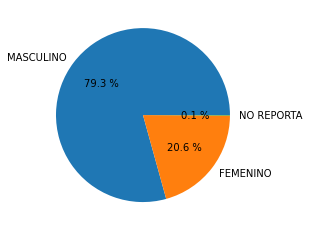

In [ ]:
#grafica de proporción para el genero
plt.pie(nuevoConteo, labels=nuevaLista,autopct="%0.1f %%")
plt.show()

In [ ]:
categoria_Ge= Homicidios_df['GRUPO ETARÍO'].unique()
print(categoria_Ge)
conteo_Ge= np.array(Homicidios_df['GRUPO ETARÍO'].value_counts())
print(conteo_Ge)

['ADULTOS' 'ADOLESCENTES' 'MENORES' 'NO REPORTADO']
[54671  2924  2170    45]


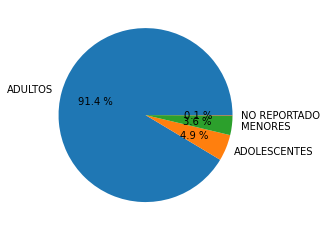

In [ ]:
plt.pie(conteo_Ge, labels=categoria_Ge,autopct="%0.1f %%")
plt.show()

####Han variado con el paso de los años?

####Seleccionamos del campo fecha solo el valor del año

In [ ]:
homicidios_solo_anio = Homicidios_df
# funcion para quedarse solo con el año
def castyear(valor):
  valor = str(valor)
  valor = valor[0:4]
  return valor
homicidios_solo_anio['FECHA HECHO'] = homicidios_solo_anio['FECHA HECHO'].apply(castyear)
homicidios_solo_anio[:1]

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376000,MOTO,2010,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


********************** [4500 4295 4549 4922 4835 5344 5609 5261 6017 6053 5068 6914 2311]
++++++++++++++++++++++ ['2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']


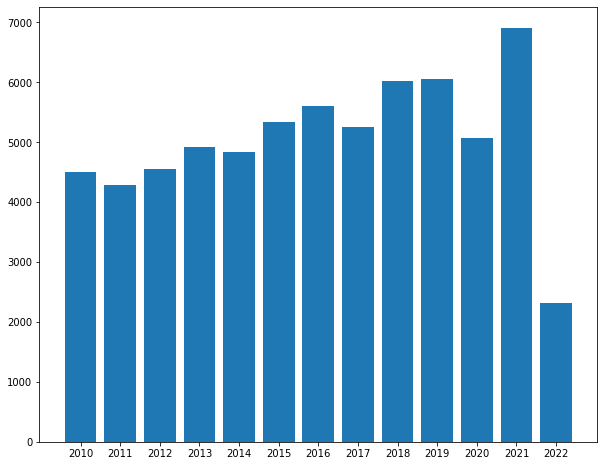

In [ ]:
from numpy.core.fromnumeric import size

data_porfecha = np.array(homicidios_solo_anio.groupby(('FECHA HECHO')).CANTIDAD.sum())

print("**********************",data_porfecha)
xx = homicidios_solo_anio['FECHA HECHO'].unique()
print("++++++++++++++++++++++",xx)
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(xx,data_porfecha,)
plt.show()

####Separando los dataframe para evaluar la consulta realizada por genero

In [ ]:
homicidios_solo_anio = Homicidios_df
homicidios_solo_mes = Homicidios_df
# funcion para quedarse solo con el año
def castyear(valor):
  valor = str(valor)
  valor = valor[0:4]
  return valor
homicidios_solo_anio['FECHA HECHO'] = homicidios_solo_anio['FECHA HECHO'].apply(castyear)
homicidios_solo_anio.tail(5) # muestra las n filas finales

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
59805,VALLE,RIOFRÍO,76616000,NO REPORTADO,2022,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
59806,VALLE,TORO,76823000,NO REPORTADO,2022,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
59807,VALLE,TORO,76823000,NO REPORTADO,2022,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,4
59808,VALLE,TULUÁ,76834000,NO REPORTADO,2022,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
59809,VALLE,TULUÁ,76834000,NO REPORTADO,2022,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [ ]:
mujeres_df = homicidios_solo_anio[homicidios_solo_anio.GENERO=='FEMENINO'] 
hombres_df = homicidios_solo_anio[homicidios_solo_anio.GENERO=='MASCULINO'] 

print(mujeres_df.shape)
print(hombres_df.shape)

(12319, 9)
(47431, 9)


In [ ]:
#Numero de homicidios diferenciando entre hombres y mujeres

#se organiza por fecha para mujeres
data_porfecha_mujer = np.array(mujeres_df.groupby(('FECHA HECHO')).CANTIDAD.sum())
anios_mujer= mujeres_df['FECHA HECHO'].unique()

#se organiza por fecha para hombres
data_porfecha_hombre = np.array(hombres_df.groupby(('FECHA HECHO')).CANTIDAD.sum())
anios_hombre= hombres_df['FECHA HECHO'].unique()

print(data_porfecha_mujer)
print(data_porfecha_hombre)

[ 926  903  902  983 1019 1052 1179 1073 1271 1203  907 1267  464]
[3570 3387 3647 3932 3814 4292 4430 4187 4730 4836 4157 5642 1844]


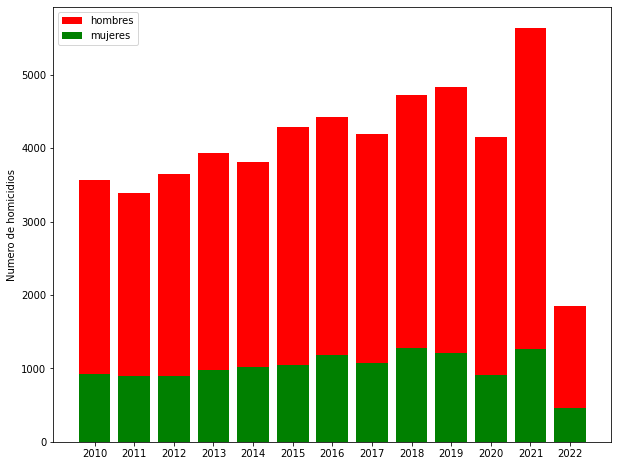

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(anios_hombre,data_porfecha_hombre,color="red",label="hombres")
ax.bar(anios_hombre,data_porfecha_mujer,color="green",label="mujeres")
ax.set_ylabel("Numero de homicidios")
plt.legend()
plt.show()

In [ ]:
#++++++++++++++Grupos  ETARÍOS
#Numero de homicidios diferenciando entre hombres y mujeres

#se organiza por fecha para mujeres
data_GrupoE_mujer = np.array(mujeres_df.groupby(('GRUPO ETARÍO')).CANTIDAD.sum())
anios_GrupoE_mujer= mujeres_df['GRUPO ETARÍO'].unique()

#se organiza por fecha para hombres
data_GrupoE_hombre = np.array(hombres_df.groupby(('GRUPO ETARÍO')).CANTIDAD.sum())
anios_GrupoE_hombre= hombres_df['GRUPO ETARÍO'].unique()

print(data_GrupoE_mujer)
print(data_GrupoE_hombre)
hombres_df['GRUPO ETARÍO'].unique()

[  772 11531   846]
[ 2245 48840  1383]


array(['ADULTOS', 'ADOLESCENTES', 'MENORES'], dtype=object)

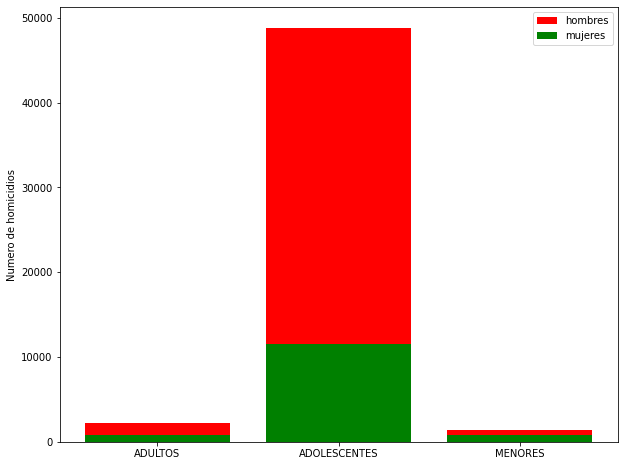

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(anios_GrupoE_hombre,data_GrupoE_hombre,color="red",label="hombres")
ax.bar(anios_GrupoE_hombre,data_GrupoE_mujer,color="green",label="mujeres")
ax.set_ylabel("Numero de homicidios")
plt.legend()
plt.show()

####2.4. [4%] ¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

In [ ]:
homicidios_solo_mes = homicidios_df2

In [ ]:
homicidios_solo_mes['Mes'] = homicidios_solo_mes['FECHA HECHO'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
delitos_df = homicidios_solo_mes[homicidios_solo_mes['ARMAS MEDIOS']=='VEHICULO'] 

In [ ]:
datosxvehiculo = np.array(delitos_df.groupby(('Mes')).CANTIDAD.sum())
datosxmes = delitos_df['Mes'].unique()

In [ ]:
datosxvehiculo
datosxmes

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

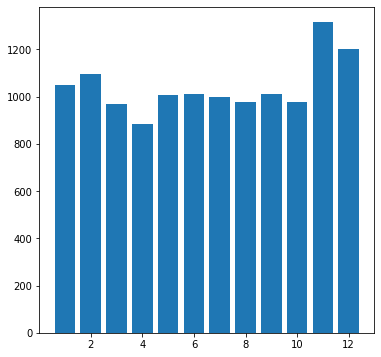

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

ax.bar(datosxmes,datosxvehiculo,)
plt.show()

####2.5. [4%] Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son las descripciones o modalidades más comunes?

In [ ]:
secuestro_df3 = secuestro_df2

In [ ]:
secuestro_df3

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,TIPO DELITO,CANTIDAD
18012,2017-05-27,52,NARIÑO,"52,835",SAN ANDRES DE TUMACO,SECUESTRO EXTORSIVO,1
18013,2017-05-28,19,CAUCA,"19,698",SANTANDER DE QUILICHAO,SECUESTRO EXTORSIVO,1
18014,2017-05-28,23,CÓRDOBA,"23,001",MONTERIA,SECUESTRO SIMPLE,1
18015,2017-05-28,76,VALLE DEL CAUCA,"76,233",DAGUA,SECUESTRO SIMPLE,1
18016,2017-05-28,76,VALLE DEL CAUCA,"76,892",YUMBO,SECUESTRO SIMPLE,1
...,...,...,...,...,...,...,...
18637,2022-05-10,5,ANTIOQUIA,"5,631",SABANETA,SECUESTRO EXTORSIVO,1
18638,2022-05-15,19,CAUCA,"19,256",EL TAMBO,SECUESTRO EXTORSIVO,1
18639,2022-05-15,52,NARIÑO,"52,838",TUQUERRES,SECUESTRO EXTORSIVO,1
18640,2022-05-19,8,ATLÁNTICO,"8,001",BARRANQUILLA,SECUESTRO EXTORSIVO,1


In [ ]:
datosxtipodelitocantidad = np.array(secuestro_df3.groupby(('TIPO DELITO')).CANTIDAD.sum())
datosxtipodelito = secuestro_df3['TIPO DELITO'].unique()

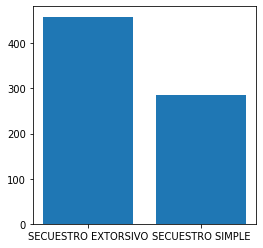

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))

ax.bar(datosxtipodelito,datosxtipodelitocantidad,)
plt.show()

###3. [25%] A partir de alguno de los conjuntos de datos seleccionados, visualice una serie de tiempo por año y mes que permita comparar la cantidad de delitos cometidos para los departamentos con mayor ocurrencia durante los últimos 5 años. Para que los resultados entre departamentos sean comparables, es importante que normalice las cantidades obtenidas por cantidad de habitantes. En este archivo puede encontrar la población por departamento para el año 2018. Asuma que la población no ha cambiado con el paso de los años.


In [ ]:
#Vamos a trabajar sobre el dataset de homicidios
homicidios_df2

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD,Mes
32170,ANTIOQUIA,ITAGUI,5360000,MOTO,2017-12-04,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,12
32171,BOYACÁ,VILLA DE LEYVA,15407000,MOTO,2017-12-04,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,12
32172,NORTE DE SANTANDER,CÚCUTA (CT),54001000,SIN EMPLEO DE ARMAS,2017-12-04,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,12
32173,NORTE DE SANTANDER,EL ZULIA,54261000,SIN EMPLEO DE ARMAS,2017-12-04,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,12
32174,ANTIOQUIA,LA PINTADA,5390000,VEHICULO,2017-12-04,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,12
...,...,...,...,...,...,...,...,...,...,...
59805,VALLE,RIOFRÍO,76616000,NO REPORTADO,2022-04-16,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,4
59806,VALLE,TORO,76823000,NO REPORTADO,2022-02-20,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,2
59807,VALLE,TORO,76823000,NO REPORTADO,2022-02-20,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,4,2
59808,VALLE,TULUÁ,76834000,NO REPORTADO,2022-04-16,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1,4


In [ ]:
#Armando los data set por los ultimos 5 años 2017-12-04
homicidios_df_year1 = homicidios_df2[(homicidios_df2['FECHA HECHO']>='2017-12-04') & (homicidios_df2['FECHA HECHO']<='2018-12-04')]
homicidios_df_year2 = homicidios_df2[(homicidios_df2['FECHA HECHO']>='2018-12-05') & (homicidios_df2['FECHA HECHO']<='2019-12-05')]
homicidios_df_year3 = homicidios_df2[(homicidios_df2['FECHA HECHO']>='2019-12-06') & (homicidios_df2['FECHA HECHO']<='2020-12-06')]
homicidios_df_year4 = homicidios_df2[(homicidios_df2['FECHA HECHO']>='2020-12-07') & (homicidios_df2['FECHA HECHO']<='2021-12-07')]
homicidios_df_year5 = homicidios_df2[(homicidios_df2['FECHA HECHO']>='2021-12-08') & (homicidios_df2['FECHA HECHO']<='2022-12-08')]

In [ ]:
homicidios_df_year1_dep = homicidios_df_year1[(homicidios_df_year1['DEPARTAMENTO'] =='CUNDINAMARCA') | (homicidios_df_year1['DEPARTAMENTO'] =='VALLE') | (homicidios_df_year1['DEPARTAMENTO'] =='ANTIOQUIA')]
homicidios_df_year2_dep = homicidios_df_year2[(homicidios_df_year2['DEPARTAMENTO'] =='CUNDINAMARCA') | (homicidios_df_year2['DEPARTAMENTO'] =='VALLE') | (homicidios_df_year2['DEPARTAMENTO'] =='ANTIOQUIA')]
homicidios_df_year3_dep = homicidios_df_year3[(homicidios_df_year3['DEPARTAMENTO'] =='CUNDINAMARCA') | (homicidios_df_year3['DEPARTAMENTO'] =='VALLE') | (homicidios_df_year3['DEPARTAMENTO'] =='ANTIOQUIA')]
homicidios_df_year4_dep = homicidios_df_year4[(homicidios_df_year4['DEPARTAMENTO'] =='CUNDINAMARCA') | (homicidios_df_year4['DEPARTAMENTO'] =='VALLE') | (homicidios_df_year4['DEPARTAMENTO'] =='ANTIOQUIA')]
homicidios_df_year5_dep = homicidios_df_year5[(homicidios_df_year5['DEPARTAMENTO'] =='CUNDINAMARCA') | (homicidios_df_year5['DEPARTAMENTO'] =='VALLE') | (homicidios_df_year5['DEPARTAMENTO'] =='ANTIOQUIA')]

In [ ]:
dff = homicidios_df_year1_dep.groupby(["DEPARTAMENTO", "Mes"]).CANTIDAD.sum()
dff

DEPARTAMENTO  Mes
ANTIOQUIA     1      77
              2      72
              3      58
              4      47
              5      61
              6      51
              7      62
              8      52
              9      58
              10     65
              11     52
              12     66
CUNDINAMARCA  1      74
              2      66
              3      91
              4      69
              5      66
              6      85
              7      79
              8      57
              9      66
              10     82
              11     73
              12     74
VALLE         1      88
              2      70
              3      72
              4      77
              5      65
              6      75
              7      66
              8      56
              9      74
              10     70
              11     47
              12     68
Name: CANTIDAD, dtype: int64

In [ ]:
homicidios_df_year1_dep2.groupby('Mes').CANTIDAD.sum()

Mes
1     74
2     66
3     91
4     69
5     66
6     85
7     79
8     57
9     66
10    82
11    73
12    74
Name: CANTIDAD, dtype: int64

Text(0.5, 1.0, 'Cundinamarca 2021')

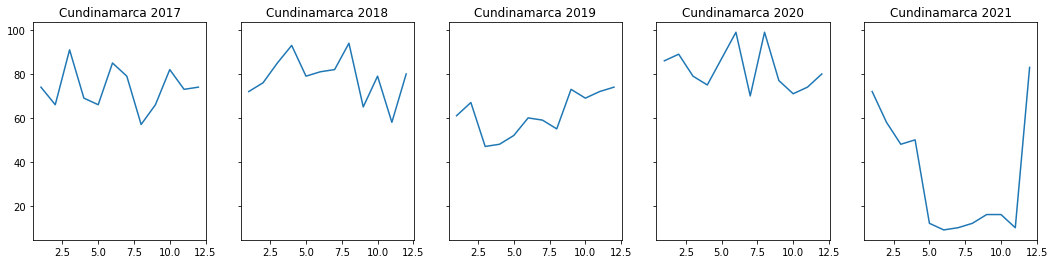

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
homicidios_df_year1_dep2 = homicidios_df_year1[(homicidios_df_year1['DEPARTAMENTO'] =='CUNDINAMARCA')]
y1 = np.array(homicidios_df_year1_dep2.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep3 = homicidios_df_year2[(homicidios_df_year2['DEPARTAMENTO'] =='CUNDINAMARCA')]
y2 = np.array(homicidios_df_year1_dep3.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep4 = homicidios_df_year3[(homicidios_df_year3['DEPARTAMENTO'] =='CUNDINAMARCA')]
y3 = np.array(homicidios_df_year1_dep4.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep5 = homicidios_df_year4[(homicidios_df_year4['DEPARTAMENTO'] =='CUNDINAMARCA')]
y4 = np.array(homicidios_df_year1_dep5.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep6 = homicidios_df_year5[(homicidios_df_year5['DEPARTAMENTO'] =='CUNDINAMARCA')]
y5 = np.array(homicidios_df_year1_dep6.groupby(('Mes')).CANTIDAD.sum())

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(18,4))
ax1.plot(x, y1)
ax1.set_title('Cundinamarca 2017')
ax2.plot(x, y2)
ax2.set_title('Cundinamarca 2018')
ax3.plot(x, y3)
ax3.set_title('Cundinamarca 2019')
ax4.plot(x, y4)
ax4.set_title('Cundinamarca 2020')
ax5.plot(x, y5)
ax5.set_title('Cundinamarca 2021')

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
homicidios_df_year1_dep2 = homicidios_df_year1[(homicidios_df_year1['DEPARTAMENTO'] =='CUNDINAMARCA')]
y1 = np.array(homicidios_df_year1_dep2.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep3 = homicidios_df_year2[(homicidios_df_year2['DEPARTAMENTO'] =='CUNDINAMARCA')]
y2 = np.array(homicidios_df_year1_dep3.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep4 = homicidios_df_year3[(homicidios_df_year3['DEPARTAMENTO'] =='CUNDINAMARCA')]
y3 = np.array(homicidios_df_year1_dep4.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep5 = homicidios_df_year4[(homicidios_df_year4['DEPARTAMENTO'] =='CUNDINAMARCA')]
y4 = np.array(homicidios_df_year1_dep5.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep6 = homicidios_df_year5[(homicidios_df_year5['DEPARTAMENTO'] =='CUNDINAMARCA')]
y5 = np.array(homicidios_df_year1_dep6.groupby(('Mes')).CANTIDAD.sum())

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(18,4))
ax1.plot(x, y1)
ax1.set_title('Cundinamarca 2017')
ax2.plot(x, y2)
ax2.set_title('Cundinamarca 2018')
ax3.plot(x, y3)
ax3.set_title('Cundinamarca 2019')
ax4.plot(x, y4)
ax4.set_title('Cundinamarca 2020')
ax5.plot(x, y5)
ax5.set_title('Cundinamarca 2021')

Text(0.5, 1.0, 'VALLE 2021')

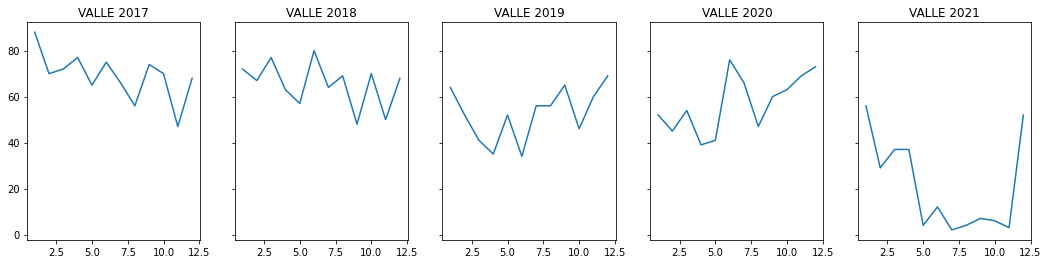

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
homicidios_df_year1_dep2 = homicidios_df_year1[(homicidios_df_year1['DEPARTAMENTO'] =='VALLE')]
y1 = np.array(homicidios_df_year1_dep2.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep3 = homicidios_df_year2[(homicidios_df_year2['DEPARTAMENTO'] =='VALLE')]
y2 = np.array(homicidios_df_year1_dep3.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep4 = homicidios_df_year3[(homicidios_df_year3['DEPARTAMENTO'] =='VALLE')]
y3 = np.array(homicidios_df_year1_dep4.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep5 = homicidios_df_year4[(homicidios_df_year4['DEPARTAMENTO'] =='VALLE')]
y4 = np.array(homicidios_df_year1_dep5.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep6 = homicidios_df_year5[(homicidios_df_year5['DEPARTAMENTO'] =='VALLE')]
y5 = np.array(homicidios_df_year1_dep6.groupby(('Mes')).CANTIDAD.sum())

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(18,4))
ax1.plot(x, y1)
ax1.set_title('VALLE 2017')
ax2.plot(x, y2)
ax2.set_title('VALLE 2018')
ax3.plot(x, y3)
ax3.set_title('VALLE 2019')
ax4.plot(x, y4)
ax4.set_title('VALLE 2020')
ax5.plot(x, y5)
ax5.set_title('VALLE 2021')

Text(0.5, 1.0, 'ANTIOQUIA 2021')

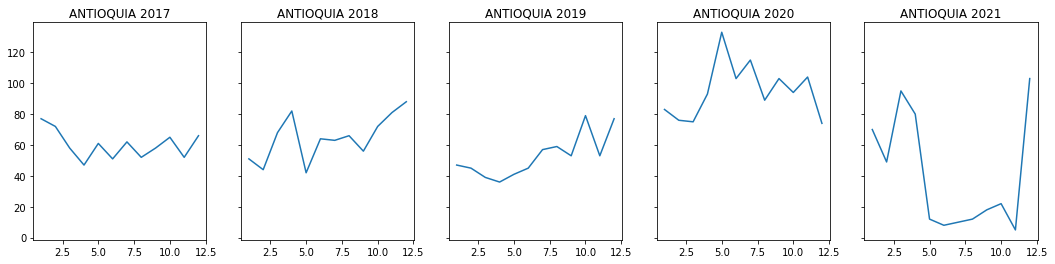

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
homicidios_df_year1_dep2 = homicidios_df_year1[(homicidios_df_year1['DEPARTAMENTO'] =='ANTIOQUIA')]
y1 = np.array(homicidios_df_year1_dep2.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep3 = homicidios_df_year2[(homicidios_df_year2['DEPARTAMENTO'] =='ANTIOQUIA')]
y2 = np.array(homicidios_df_year1_dep3.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep4 = homicidios_df_year3[(homicidios_df_year3['DEPARTAMENTO'] =='ANTIOQUIA')]
y3 = np.array(homicidios_df_year1_dep4.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep5 = homicidios_df_year4[(homicidios_df_year4['DEPARTAMENTO'] =='ANTIOQUIA')]
y4 = np.array(homicidios_df_year1_dep5.groupby(('Mes')).CANTIDAD.sum())

homicidios_df_year1_dep6 = homicidios_df_year5[(homicidios_df_year5['DEPARTAMENTO'] =='ANTIOQUIA')]
y5 = np.array(homicidios_df_year1_dep6.groupby(('Mes')).CANTIDAD.sum())

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(18,4))
ax1.plot(x, y1)
ax1.set_title('ANTIOQUIA 2017')
ax2.plot(x, y2)
ax2.set_title('ANTIOQUIA 2018')
ax3.plot(x, y3)
ax3.set_title('ANTIOQUIA 2019')
ax4.plot(x, y4)
ax4.set_title('ANTIOQUIA 2020')
ax5.plot(x, y5)
ax5.set_title('ANTIOQUIA 2021')

In [ ]:
print(' ')
print('---------------------Homicidios-------------------------------')
homicidios_df_year1.groupby(('DEPARTAMENTO')).CANTIDAD.sum().nlargest(3)
print(homicidios_df_year1.groupby(('DEPARTAMENTO')).CANTIDAD.sum().nlargest(3))

 
---------------------Homicidios-------------------------------
DEPARTAMENTO
CUNDINAMARCA    882
VALLE           828
ANTIOQUIA       721
Name: CANTIDAD, dtype: int64


In [ ]:
Poblacion2018
#z i = (x i – mínimo (x)) / (máximo (x) – mínimo (x))

,departamento,población
0,ANTIOQUIA,2427129
1,CUNDINAMARCA,7412566
2,VALLE,2227642


###4. [30%] A partir de los conjuntos de datos seleccionados, construya un único dataset que integre la totalidad de los delitos ocurridos por departamento y municipio. Muestre los valores normalizados por cantidad de habitantes realizando un proceso similar al del punto anterior. En este archivo puede encontrar proyecciones anuales de las poblaciones por departamento. Utilice la proyección para el año en curso. Considere solamente los municipios con más de 1 millón de habitantes.


####Cargando nuevamente los dataframe

In [ ]:
secuestro_df = Secuestro_df
homicidios_df = Homicidios_df
extorsion_df = Extorcion_df
terrorismo_df = Terrorismo_df

In [ ]:
secuestroNuevo_df =secuestro_df[['FECHA HECHO','DEPARTAMENTO','MUNICIPIO', 'CANTIDAD']]
homicidiosNuevo_df =homicidios_df[['FECHA HECHO','DEPARTAMENTO','MUNICIPIO', 'CANTIDAD']]
extorsionNuevo_df =extorsion_df[['FECHA HECHO','DEPARTAMENTO','MUNICIPIO', 'CANTIDAD']]
terrorismoNuevo_df =terrorismo_df[['FECHA HECHO','Departamento','Municipio', 'CANTIDAD']]
# se renombra las columnas "Departamento"  y "Municipio" a MAYUSCULAS para concatenar luego
terrorismoNuevo_df = terrorismoNuevo_df.rename(columns={'Departamento':'DEPARTAMENTO',
                                   'Municipio':'MUNICIPIO'})

####Concatenacion de los 4 dataFrame

In [ ]:
frames = [secuestroNuevo_df,homicidiosNuevo_df, extorsionNuevo_df, terrorismoNuevo_df]
result_df = pd.concat(frames)
result_df

,FECHA HECHO,DEPARTAMENTO,MUNICIPIO,CANTIDAD
0,01/01/1996 12:00:00 AM,ANTIOQUIA,SANTAFE DE ANTIOQUIA,1
1,01/01/1996 12:00:00 AM,CUNDINAMARCA,FUSAGASUGA,1
2,01/02/1996 12:00:00 AM,ANTIOQUIA,ANGOSTURA,1
3,01/02/1996 12:00:00 AM,ANTIOQUIA,BELLO,1
4,01/02/1996 12:00:00 AM,BOGOTÁ D.C.,"BOGOTA, D.C.",1
...,...,...,...,...
3949,20/01/2022,NORTE DE SANTANDER,TIBÚ,1
3950,21/01/2022,NORTE DE SANTANDER,TIBÚ,1
3951,27/01/2022,NORTE DE SANTANDER,TIBÚ,1
3952,23/02/2022,NORTE DE SANTANDER,TIBÚ,1


In [ ]:
# se reemplazan algunos departamentos que estan escritos diferentes
result_df['DEPARTAMENTO'] = result_df['DEPARTAMENTO'].replace(
    ['SAN ANDRÉS ISLAS','LA GUAJIRA','VALLE'],['SAN ANDRÉS','GUAJIRA','VALLE DEL CAUCA'])

####se crea dataframe del archivo excel con las proyecciones

In [ ]:
dataExcel = np.array(proyeccion_df.iloc[11:][0:])
colExcel = proyeccion_df.iloc[10][0:]
dataProyeccion_df = pd.DataFrame(dataExcel, columns=colExcel)
dataProyeccion_df

10,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,Total
0,05,Antioquia,05001,Medellín,2018,Cabecera Municipal,2382399
1,05,Antioquia,05001,Medellín,2018,Centros Poblados y Rural Disperso,44730
2,05,Antioquia,05001,Medellín,2018,Total,2427129
3,05,Antioquia,05001,Medellín,2019,Cabecera Municipal,2439470
4,05,Antioquia,05001,Medellín,2019,Centros Poblados y Rural Disperso,44075
...,...,...,...,...,...,...,...
60583,99,Vichada,99773,Cumaribo,2034,Centros Poblados y Rural Disperso,93327
60584,99,Vichada,99773,Cumaribo,2034,Total,96319
60585,99,Vichada,99773,Cumaribo,2035,Cabecera Municipal,3001
60586,99,Vichada,99773,Cumaribo,2035,Centros Poblados y Rural Disperso,94793


####filtro de datos para municipios con mas de 1.000.000 de habitantes en año 2022

In [ ]:
dataFiltada_2022 = dataProyeccion_df[(dataProyeccion_df['Total']>=1000000) & (dataProyeccion_df['ÁREA GEOGRÁFICA']=='Total') & (dataProyeccion_df['AÑO']==2022)]
print(" Numero de municipios en 2022 con mas de 1.000.000 de habitantes -> ",len(dataFiltada_2022))
dataFiltada_2022

 Numero de municipios en 2022 con mas de 1.000.000 de habitantes ->  5


10,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,Total
14,05,Antioquia,05001,Medellín,2022,Total,2612958
6764,08,Atlántico,08001,Barranquilla,2022,Total,1312473
8006,11,"Bogotá, D.C.",11001,"Bogotá, D.C.",2022,Total,7901653
8060,13,Bolívar,13001,Cartagena de Indias,2022,Total,1055035
54284,76,Valle del Cauca,76001,Cali,2022,Total,2280907


####reemplazando las ciudades que estan escritas de maneras diferentes, esto se hace teniendo en cuenta el resultado anterior de las 5 ciudedes con mas de 1.000.000 de habitantes

In [ ]:
result_df['MUNICIPIO'] = result_df['MUNICIPIO'].replace(
    ['CALI (CT)','MEDELLÍN (CT)','BOGOTÁ D.C. (CT)','BARRANQUILLA (CT)','CARTAGENA (CT)'],['CALI','MEDELLIN','BOGOTÁ D.C.','BARRANQUILLA','CARTAGENA'])

####convertir fecha a solo año del dataframe concatenado con los delitos

In [ ]:
result_df['FECHA HECHO'] = pd.to_datetime(result_df['FECHA HECHO'])
result_df.head()

,FECHA HECHO,DEPARTAMENTO,MUNICIPIO,CANTIDAD
0,1996-01-01,ANTIOQUIA,SANTAFE DE ANTIOQUIA,1
1,1996-01-01,CUNDINAMARCA,FUSAGASUGA,1
2,1996-01-02,ANTIOQUIA,ANGOSTURA,1
3,1996-01-02,ANTIOQUIA,BELLO,1
4,1996-01-02,BOGOTÁ D.C.,"BOGOTA, D.C.",1


####Formatea la fecha para que solo quede al año

In [ ]:
result_df['FECHA HECHO'] = result_df['FECHA HECHO'].apply(castyear)
result_df.head()

,FECHA HECHO,DEPARTAMENTO,MUNICIPIO,CANTIDAD
0,1996,ANTIOQUIA,SANTAFE DE ANTIOQUIA,1
1,1996,CUNDINAMARCA,FUSAGASUGA,1
2,1996,ANTIOQUIA,ANGOSTURA,1
3,1996,ANTIOQUIA,BELLO,1
4,1996,BOGOTÁ D.C.,"BOGOTA, D.C.",1


####filtrando las 5 ciudades con mas de 1.000.000 de habitantes desde el dataframe concatenada para el año 2022

In [ ]:
result_df.groupby(('MUNICIPIO')).CANTIDAD.sum()
result_ciudades_df = result_df[( (result_df['MUNICIPIO']=='BOGOTA, D.C.') | (result_df['MUNICIPIO']=='MEDELLIN') | (result_df['MUNICIPIO']=='MEDELLÍN (CT)') |
           (result_df['MUNICIPIO']=='CALI')| (result_df['MUNICIPIO']=='BARRANQUILLA') | (result_df['MUNICIPIO']=='CARTAGENA')) & 
          (result_df['FECHA HECHO']=='2022')]
result_ciudades_df

,FECHA HECHO,DEPARTAMENTO,MUNICIPIO,CANTIDAD
18603,2022,ANTIOQUIA,MEDELLIN,1
18607,2022,BOGOTÁ D.C.,"BOGOTA, D.C.",1
18610,2022,BOGOTÁ D.C.,"BOGOTA, D.C.",1
18612,2022,ANTIOQUIA,MEDELLIN,1
18630,2022,BOLÍVAR,CARTAGENA,1
...,...,...,...,...
69129,2022,ANTIOQUIA,MEDELLIN,1
69130,2022,ATLÁNTICO,BARRANQUILLA,1
3862,2022,BOLÍVAR,CARTAGENA,1
3903,2022,VALLE DEL CAUCA,CALI,1


####Obteniendo los delitos para el año 2022 de las ciudades con mas de 1.000.000 de habitantes

In [ ]:
result_ciudades_df.groupby(('MUNICIPIO')).CANTIDAD.sum()

MUNICIPIO
BARRANQUILLA    109
BOGOTA, D.C.    522
CALI            255
CARTAGENA       154
MEDELLIN        299
Name: CANTIDAD, dtype: int64

In [ ]:
dataFiltada_2022['MPIO']

14                  Medellín
6764            Barranquilla
8006            Bogotá, D.C.
8060     Cartagena de Indias
54284                   Cali
Name: MPIO, dtype: object